In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
data = pd.read_csv(r"E:\Data Science Projects\Project Files\Taxi fare prediction\TaxiFare.csv")

In [3]:
data

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [4]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [5]:
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [7]:
a = data.groupby('no_of_passenger')['no_of_passenger'].sum()

<Axes: xlabel='no_of_passenger'>

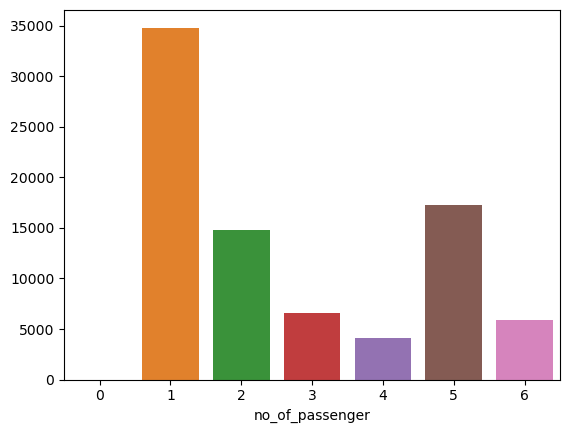

In [8]:
sns.barplot(x=a.index, y=a.values)

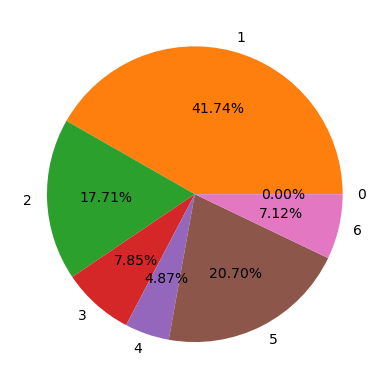

In [9]:
plt.pie(a, labels=a.index, autopct='%.2f%%')
plt.show()

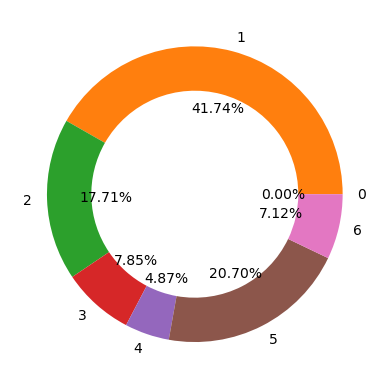

In [10]:
plt.pie(a, labels=a.index, autopct='%.2f%%', wedgeprops=dict(width=0.3))
plt.show()

<Axes: xlabel='amount', ylabel='Count'>

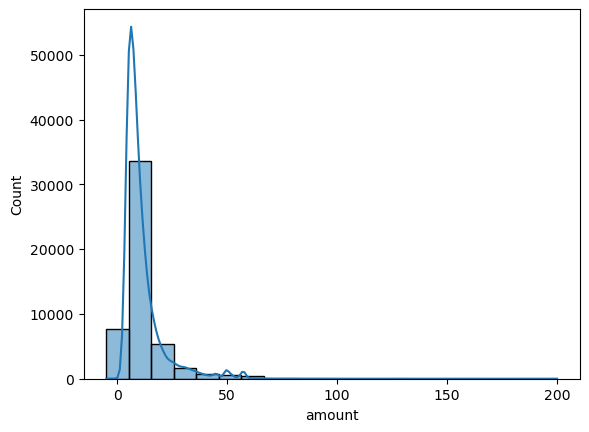

In [11]:
sns.histplot(data['amount'], bins=20, kde=True)

<Axes: xlabel='amount'>

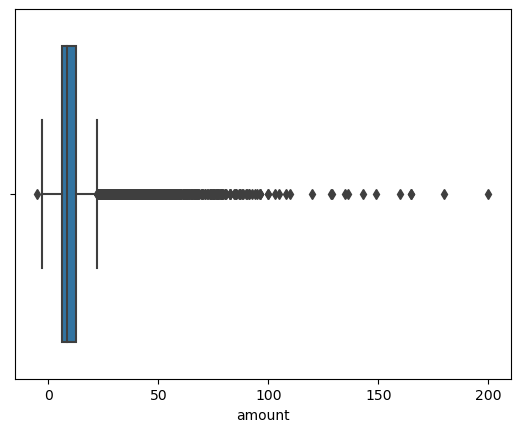

In [12]:
sns.boxplot(x = 'amount', data=data)

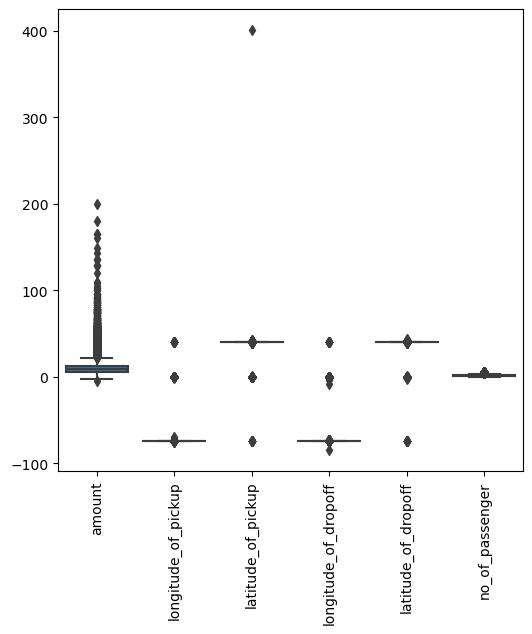

In [13]:
plt.figure(figsize=(6,6))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

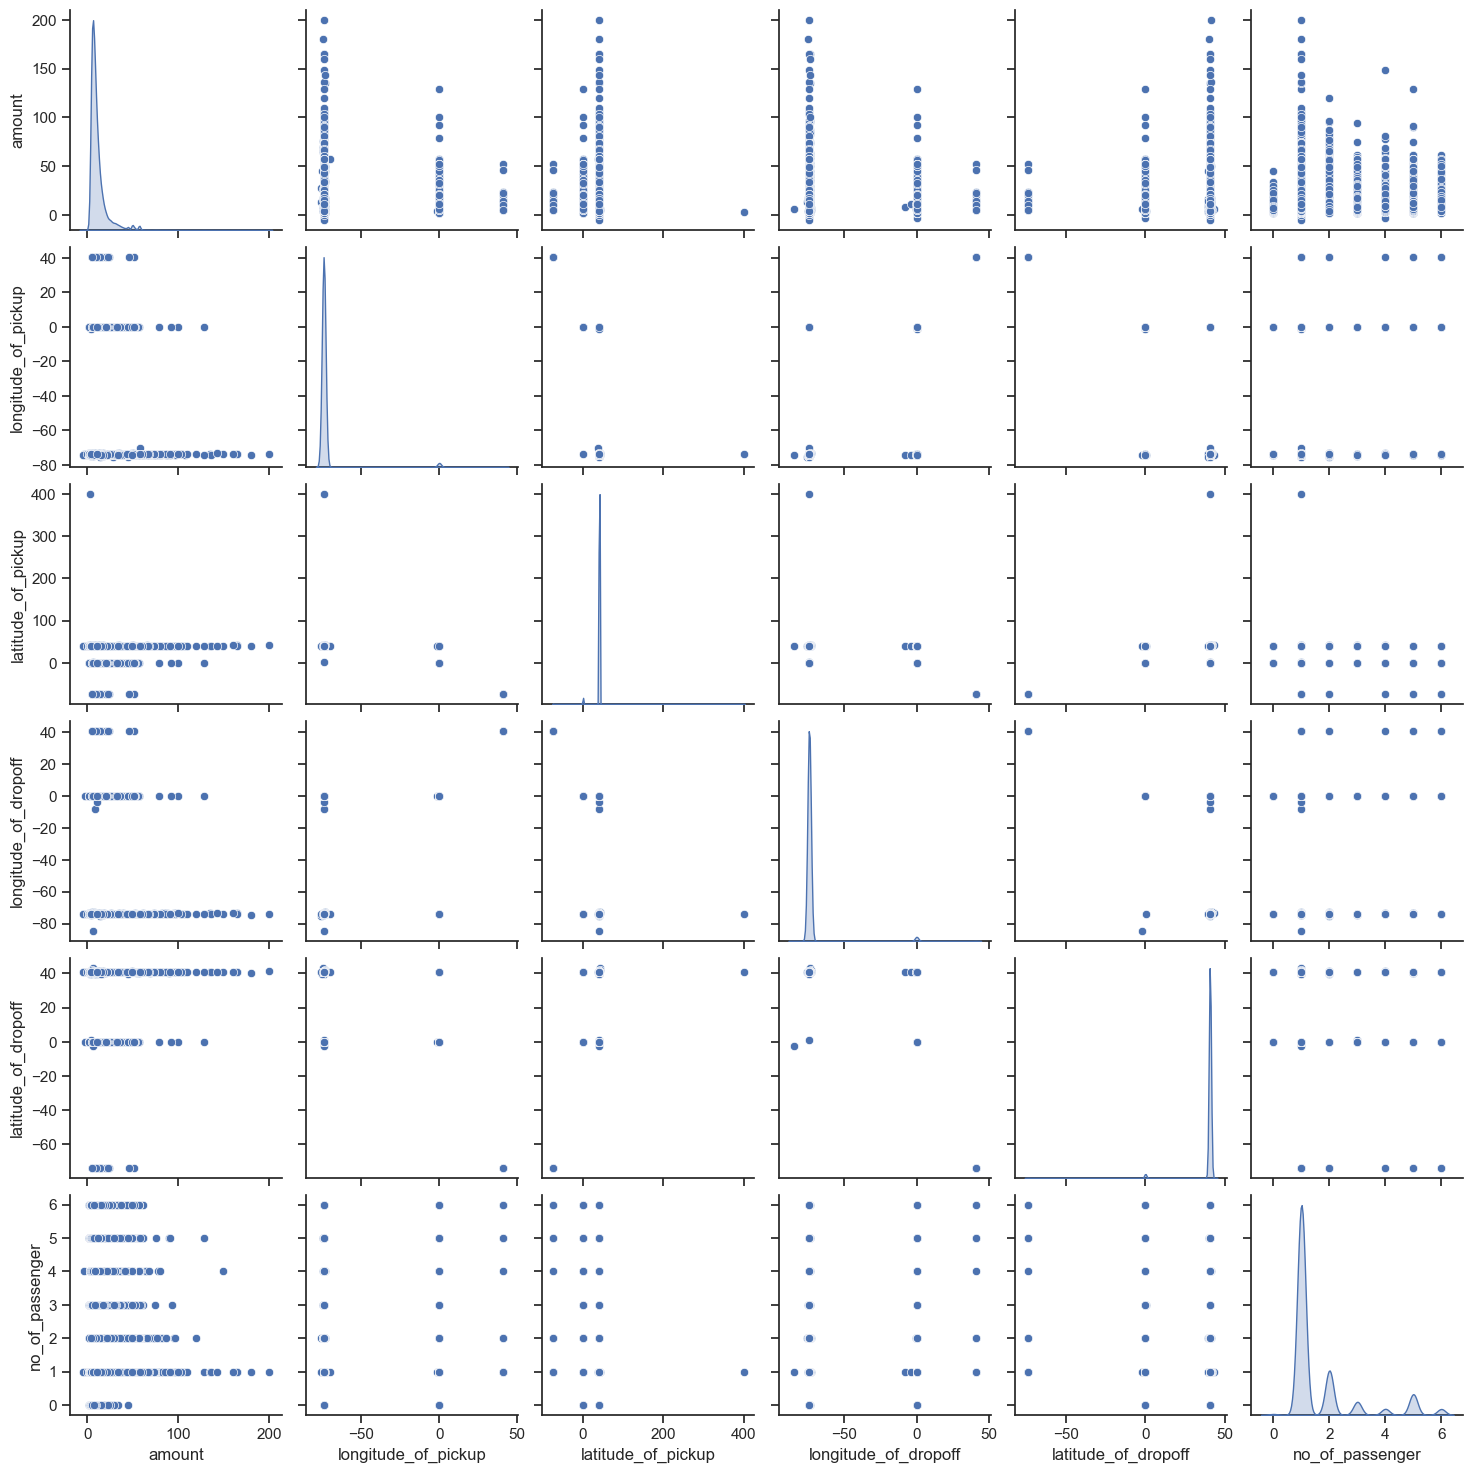

In [14]:
sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde", markers="o")
plt.show()

<Axes: xlabel='latitude_of_pickup', ylabel='longitude_of_pickup'>

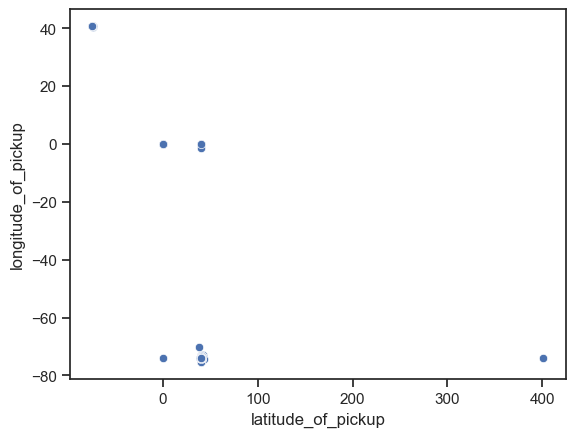

In [15]:
sns.scatterplot(x='latitude_of_pickup', y='longitude_of_pickup', data=data)

<Axes: xlabel='no_of_passenger', ylabel='count'>

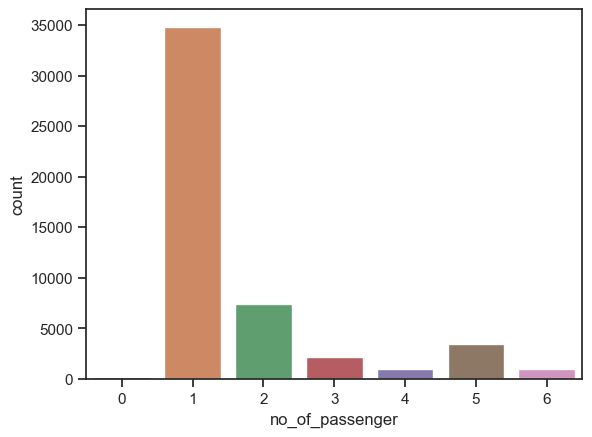

In [16]:
sns.countplot(x='no_of_passenger', data=data)

<Axes: xlabel='no_of_passenger', ylabel='amount'>

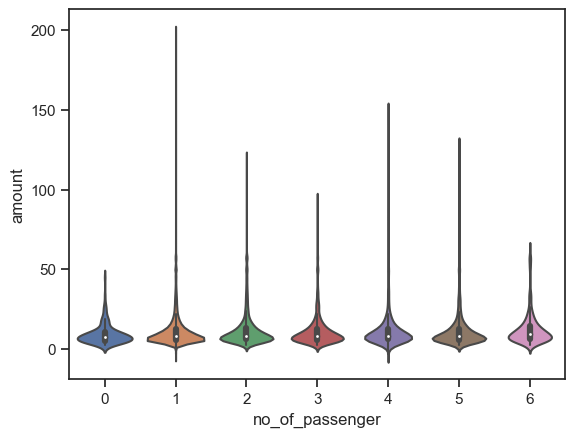

In [17]:
sns.violinplot(x='no_of_passenger', y='amount', data=data)

<Axes: xlabel='latitude_of_dropoff'>

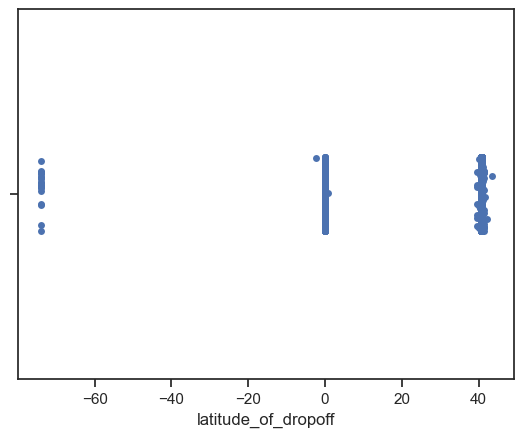

In [18]:
sns.stripplot(x='latitude_of_dropoff', data=data)

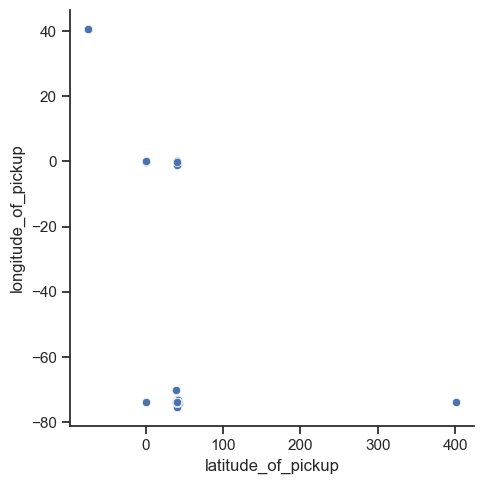

In [19]:
sns.relplot(x='latitude_of_pickup', y='longitude_of_pickup', data=data)

<Axes: xlabel='amount', ylabel='Density'>

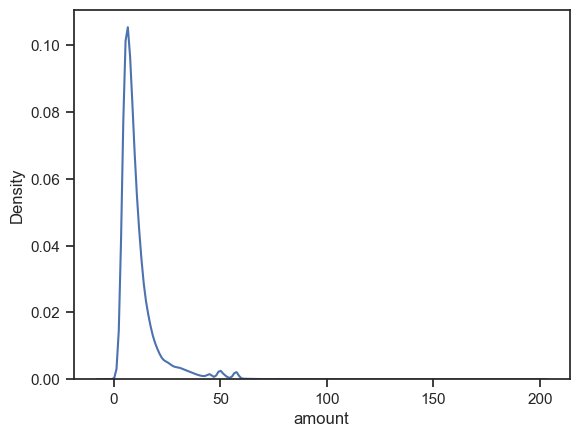

In [20]:
sns.kdeplot(x='amount', data=data)

In [22]:
#sns.swarmplot(data=data)
#plt.show()

# Outlier Detection

In [23]:
def remove_outlier_IQR(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound =Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col]<upper_bound)]

In [24]:
imp_col = ["amount","longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"]

In [25]:
for col in imp_col:
    data= remove_outlier_IQR(data,col)

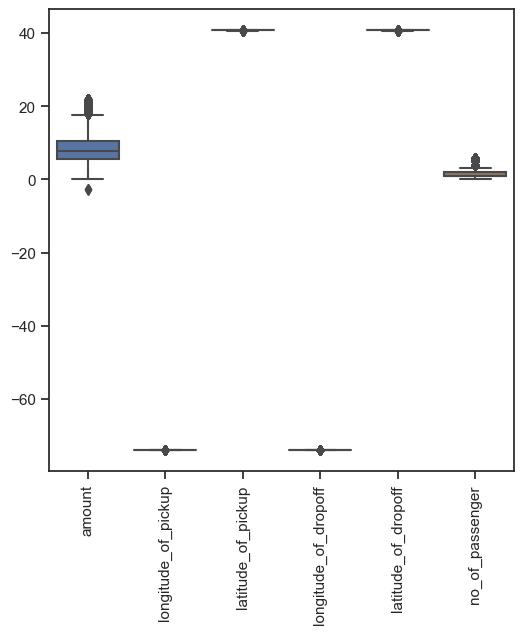

In [26]:
plt.figure(figsize=(6,6))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41525 entries, 1 to 49998
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             41525 non-null  object             
 1   amount                41525 non-null  float64            
 2   date_time_of_pickup   41525 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   41525 non-null  float64            
 4   latitude_of_pickup    41525 non-null  float64            
 5   longitude_of_dropoff  41525 non-null  float64            
 6   latitude_of_dropoff   41525 non-null  float64            
 7   no_of_passenger       41525 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 2.9+ MB


In [28]:
data.shape

(41525, 8)

In [29]:
data.drop(['unique_id','date_time_of_pickup'],axis=1,inplace=True)

In [30]:
data

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1
...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1


In [31]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,41525.000000,41525.000000,41525.000000,41525.000000,41525.000000,41525.000000
mean,8.641741,-73.981972,40.752763,-73.981005,40.753336,1.663191
std,3.868476,0.015965,0.021170,0.016608,0.022149,1.285468
min,-3.000000,-74.026443,40.692942,-74.023408,40.693140,0.000000
25%,5.700000,-73.992828,40.738326,-73.992059,40.738651,1.000000
50%,7.700000,-73.982834,40.753642,-73.982027,40.754502,1.000000
75%,10.500000,-73.971661,40.766772,-73.970752,40.767593,2.000000
max,22.100000,-73.934288,40.811176,-73.935145,40.812447,6.000000


# X and Y Split

In [32]:
x=data.drop('amount',axis=1)
y=data['amount']

In [33]:
x

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
1,-74.016048,40.711303,-73.979268,40.782004,1
2,-73.982738,40.761270,-73.991242,40.750562,2
3,-73.987130,40.733143,-73.991567,40.758092,1
4,-73.968095,40.768008,-73.956655,40.783762,1
5,-74.000964,40.731630,-73.972892,40.758233,1
...,...,...,...,...,...
49994,-73.976212,40.744832,-73.981567,40.724635,1
49995,-73.999973,40.748531,-74.016899,40.705993,1
49996,-73.984756,40.768211,-73.987366,40.760597,1
49997,-74.002698,40.739428,-73.998108,40.759483,1


In [34]:
y

1        16.9
2         5.7
3         7.7
4         5.3
5        12.1
         ... 
49994     8.5
49995    15.0
49996     7.5
49997     6.9
49998     4.5
Name: amount, Length: 41525, dtype: float64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
x_train

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
44487,-74.001402,40.731023,-73.977957,40.751497,1
26614,-73.965892,40.762412,-73.954675,40.778057,1
33804,-73.989122,40.730757,-73.971253,40.761367,1
2697,-74.008057,40.740313,-74.001040,40.735093,2
26170,-73.983908,40.756830,-73.980422,40.743392,1
...,...,...,...,...,...
24955,-73.983928,40.761661,-74.004418,40.736822,1
38618,-73.974550,40.744197,-74.013452,40.714637,1
36575,-73.979212,40.783457,-73.947052,40.776100,2
25557,-73.968197,40.757993,-73.986307,40.761897,1


In [37]:
y_train

44487     8.1
26614     6.0
33804    14.5
2697      6.1
26170     6.9
         ... 
24955    14.5
38618    16.1
36575    12.5
25557     8.5
3284      6.5
Name: amount, Length: 33220, dtype: float64

In [38]:
x_test

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
30007,-74.008602,40.733290,-74.013893,40.714752,1
4715,-74.002270,40.739987,-73.995102,40.760077,2
8421,-73.988290,40.765755,-74.009575,40.720467,2
16012,-73.978329,40.766525,-73.991250,40.750232,1
45889,-73.981803,40.732390,-73.977140,40.752380,5
...,...,...,...,...,...
18288,-74.000864,40.757833,-73.954400,40.808452,1
6619,-73.990002,40.751612,-73.983190,40.747817,1
42238,-73.979758,40.743697,-73.957530,40.770312,3
41958,-73.993387,40.747290,-73.985625,40.744047,2


In [39]:
y_test

30007     6.1
4715     13.5
8421     12.1
16012     8.9
45889     6.1
         ... 
18288    17.9
6619      3.7
42238     7.7
41958     4.5
36354     8.5
Name: amount, Length: 8305, dtype: float64

# Random Forest Regressor

In [40]:
rf=RandomForestRegressor(random_state=0)

In [41]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [42]:
y_pred=rf.predict(x_test)

In [43]:
mae = mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error',mae)
print('Mean Squared Error',mse)
print('Root Mean Absolute Error',rmse)
print('R2 Score',r2)

Mean Absolute Error 1.54305925346177
Mean Squared Error 4.709370352712691
Root Mean Absolute Error 2.1701083734949025
R2 Score 0.690430585307513


# Linear Regression

In [50]:
x1=data.drop('amount',axis=1)
y1=data['amount']

In [51]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [52]:
lr= LinearRegression()

In [53]:
lr.fit(x1_train,y1_train)

LinearRegression()

In [54]:
y1_pred=lr.predict(x1_test)

In [55]:
mae = mean_absolute_error(y1_test,y1_pred)
mse= mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1_test, y1_pred)
print('Mean Absolute Error',mae)
print('Mean Squared Error',mse)
print('Root Mean Absolute Error',rmse)
print('R2 Score',r2)

Mean Absolute Error 2.9919279324311687
Mean Squared Error 14.530829305939992
Root Mean Absolute Error 3.8119324896881364
R2 Score 0.009694232129656144


In [56]:
data

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1
...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1


# Tuning

In [58]:
param_grid={
    'n_estimators':[10,50,100,150],
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,8,10]
}

In [59]:
rf1=RandomForestRegressor(random_state=42)

In [64]:
grid_search =GridSearchCV(estimator=rf1,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)

In [61]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [10, 50, 100, 150]})

In [62]:
print("Best Parameters",grid_search.best_params_)

Best Parameters {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}


In [63]:
best_model=grid_search.best_estimator_
pred = best_model.predict(x_test)

In [66]:
mae = mean_absolute_error(y_test,pred)
mse= mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print('Mean Absolute Error',mae)
print('Mean Squared Error',mse)
print('Root Mean Absolute Error',rmse)
print('R2 Score',r2)

Mean Absolute Error 1.5354223687104414
Mean Squared Error 4.645691753014481
Root Mean Absolute Error 2.155386682944497
R2 Score 0.6946164839225277


In [68]:
import folium

In [84]:
map_center=[40.712278,-73.84161]
zoom_level=10

map_object=folium.Map(location=map_center,zoom_start=zoom_level)

In [85]:
latitude_list=[40.712278,40.782004,40.750562,40.758092]
longitude_list = [-73.84161,-73.979268,-73.991242,-73.991567]

In [86]:
for lat, lon in zip(latitude_list,longitude_list):
    folium.Marker([lat,lon],popup=f'Lat: {lat},Lon:{lon}').add_to(map_object)
map_object